In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time

In [8]:
# Configuração do Selenium
driver_path = '/home/soutes/Downloads/chromedriver-linux64/chromedriver'  # Substitua pelo caminho do seu driver
url = 'https://www.gralhaalugueis.com.br/aluguel/apartamento'

# Configure o Service para inicializar o driver
service = Service(driver_path)
driver = webdriver.Chrome(service=service)

# Acesse o URL
driver.get(url)

# Aguarda o carregamento completo da página
time.sleep(20)  # Ajuste conforme a velocidade da sua conexão

# Obtendo o HTML da página
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

driver.quit()

In [30]:
# Configuração do Selenium
driver_path = '/home/soutes/Downloads/chromedriver-linux64/chromedriver'  # Substitua pelo caminho do seu driver
url = 'https://www.gralhaalugueis.com.br/aluguel/apartamento'

# Configure o Service para inicializar o driver
service = Service(driver_path)
driver = webdriver.Chrome(service=service)

# Acesse o URL
driver.get(url)

# Aguarda o carregamento inicial da página
time.sleep(45)

# Obtém o número total de itens
try:
    total_itens_text = driver.find_element(By.CLASS_NAME, "ListResult_InfoBar_CountMsg").text
    total_itens = int(total_itens_text.split()[0])  # Extrai o número antes de "apartamentos para alugar"
except Exception as e:
    print(f"Erro ao obter o número de itens: {e}")
    total_itens = 0

# Rola a página até carregar todos os itens
loaded_items = 0
while loaded_items < total_itens:
    # Role a página para baixo
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Aguarda o carregamento de novos itens

    # Conta os itens carregados
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    loaded_items = len(soup.find_all(class_="Info_Header_Title"))
    print(f"Itens carregados: {loaded_items}/{total_itens}")

# Obtendo o HTML completo após rolar
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

driver.quit()

# Agora, o HTML contém todos os itens carregados


Itens carregados: 36/78
Itens carregados: 72/78
Itens carregados: 78/78


<html lang="pt-BR">
 <head>
  <!-- Script Head Top -->
  <!-- Script Head Top -->
  <meta charset="utf-8"/>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-43W2WYML5H&amp;l=dataLayer&amp;cx=c&amp;gtm=45He4cc1v9137079730za200" type="text/javascript">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-M4NQLD46">
  </script>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"594445833",accountID:"3384610",trustKey:"3384610",xpid:"VwUPVVBSCBAFUFdSBAQEUVA=",licenseKey:"NRJS-9202e9b06664b271877",applicationID:"546035374"};;/*! For license information please see nr-loader-spa-1.277.0.min.js.LICENSE.txt */
(()=>{var e,t,r={8122:(e,t,r)=>{"use strict";r.d(t,{a:()=>i});var n=r(944);functi
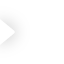
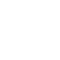
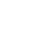
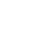
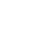
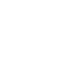
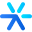
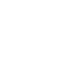
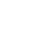
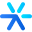

In [9]:
print(soup.prettify())

In [49]:
# Extração dos dados
titulos = []
precos = []
tamanhos = []
quartos = []
banheiros = []
garagens = []

# Itera sobre cada card para coletar as informações
for card in soup.find_all(class_="Info_Header_Title"):
    # Título com link
    link_element = card.find("a")
    titulo = link_element["href"] if link_element else None
    titulos.append(titulo)

    # Preço
    link_element = card.find("a")
    link = link_element["href"] if link_element else None
    preco = None

    if link and "rs" in link:
        start = link.find("rs") + 2  # Localiza 'rs' e adiciona 2 para o número
        end = link.find("/", start)  # Localiza o próximo '/' após o número
        if end != -1:
            preco = int(link[start:end])  # Extrai e converte o número para inteiro
    precos.append(preco)



    # Tamanho, quartos, banheiros, garagem
    properties_list = card.find_next(class_="Card_Info_Properties_List")

    if properties_list:
        # Capturar o número após os ícones usando `find` e `find_next`
        tamanho_element = properties_list.find(class_="fal fa-clone")
        tamanho = (
            tamanho_element.find_next("span").text.strip().replace("m²", "")
            if tamanho_element and tamanho_element.find_next("span")
            else None
        )
        tamanhos.append(tamanho)

        quartos_element = properties_list.find(class_="fal fa-bed")
        quarto = (
            quartos_element.find_next("span").text.strip()
            if quartos_element and quartos_element.find_next("span")
            else None
        )
        quartos.append(quarto)

        banheiros_element = properties_list.find(class_="fal fa-shower")
        banheiro = (
            banheiros_element.find_next("span").text.strip()
            if banheiros_element and banheiros_element.find_next("span")
            else None
        )
        banheiros.append(banheiro)

        garagem_element = properties_list.find(class_="fal fa-car-alt")
        garagem = (
            garagem_element.find_next("span").text.strip()
            if garagem_element and garagem_element.find_next("span")
            else "-"
        )
        garagens.append(garagem)
    else:
        tamanhos.append(None)
        quartos.append(None)
        banheiros.append(None)
        garagens.append(None)


In [50]:
# Criando o DataFrame
data = {
    'Titulo': titulos,
    'Preco': precos,
    'Tamanho': tamanhos,
    'Quartos': quartos,
    'Banheiros': banheiros,
    'Garagem': garagens
}

df = pd.DataFrame(data)

# Exibe o DataFrame
print(df)

# Opcional: salvar em um arquivo CSV
df.to_csv('imoveis_gralha.csv', index=False)

                                               Titulo  Preco Tamanho Quartos  \
0   /imovel/aluguel+apartamento+2-quartos+centro+f...   2800      64       2   
1   /imovel/aluguel+apartamento+2-quartos+bom-abri...   2800   55.61       2   
2   /imovel/aluguel+apartamento+3-quartos+agronomi...  15500  397.02       3   
3   /imovel/aluguel+apartamento+3-quartos+campeche...   7800     115       3   
4   /imovel/aluguel+apartamento+4-quartos+centro+f...  11000  256.43       4   
..                                                ...    ...     ...     ...   
73  /imovel/aluguel+apartamento+2-quartos+centro+f...   7700  100.69       2   
74  /imovel/aluguel+apartamento+2-quartos+centro+f...   6600   72.96       2   
75  /imovel/aluguel+apartamento+3-quartos+centro+f...   4000   81.23       3   
76  /imovel/aluguel+apartamento+2-quartos+trindade...   2900   65.95       2   
77  /imovel/aluguel+apartamento+3-quartos+centro+f...   5000      81       3   

   Banheiros Garagem  
0          1    

In [51]:
import pandas as pd

# Leitura do arquivo CSV gerado anteriormente
csv_file = 'imoveis_gralha.csv'

# Carregando os dados no DataFrame, forçando a coluna Preco como string
df = pd.read_csv(csv_file, dtype={'Preco': str})

# Corrige a coluna Preco para transformar valores em inteiros
if 'Preco' in df.columns:
    df['Preco'] = df['Preco'].apply(lambda x: int(str(x).replace('.', '').strip()) if pd.notnull(x) else None)

In [52]:
# Tamanho do dataframe
df.shape

(78, 6)

In [53]:
print(df.dtypes)

Titulo        object
Preco          int64
Tamanho      float64
Quartos        int64
Banheiros      int64
Garagem       object
dtype: object


In [54]:
# Opcional: verificar as primeiras linhas
df.head(20)


,Titulo,Preco,Tamanho,Quartos,Banheiros,Garagem
0,/imovel/aluguel+apartamento+2-quartos+centro+f...,2800,64.00,2,1,1
1,/imovel/aluguel+apartamento+2-quartos+bom-abri...,2800,55.61,2,1,1
2,/imovel/aluguel+apartamento+3-quartos+agronomi...,15500,397.02,3,3,2
3,/imovel/aluguel+apartamento+3-quartos+campeche...,7800,115.00,3,2,2
4,/imovel/aluguel+apartamento+4-quartos+centro+f...,11000,256.43,4,6,3
5,/imovel/aluguel+apartamento+1-quarto+carvoeira...,3400,51.41,1,1,1
6,/imovel/aluguel+apartamento+2-quartos+kobrasol...,4300,73.92,2,2,1
7,/imovel/aluguel+apartamento+2-quartos+centro+f...,3300,63.23,2,1,-
8,/imovel/aluguel+apartamento+3-quartos+corrego-...,4950,91.38,3,2,2
9,/imovel/aluguel+apartamento+2-quartos+centro+f...,2700,57.18,2,1,-


In [55]:
#Contagem dos nulos
df.isnull().sum()

Titulo       0
Preco        0
Tamanho      0
Quartos      0
Banheiros    0
Garagem      0
dtype: int64